

---
#Testando e Usando o TensorFlow

Ótimo! Agora que configuramos o ambiente para trabalhar com GPU, vamos verificar como ficou a configuração e e realizar um teste com TensorFlow.



---


# Instalando TensorFlow

In [ ]:
!pip install tensorflow



---


# Verificando a Versão CUDA e do CuDNN

Para verificar a versão do CuDNN instalada no seu ambiente Python, você pode usar o seguinte comando:

In [ ]:
import tensorflow as tf
print("Versão do TensorFlow:", tf.__version__)

# Informações sobre a versão do CUDA e do cuDNN
print("Versão do CUDA:", tf.sysconfig.get_build_info()["cuda_version"])
print("Versão do cuDNN:", tf.sysconfig.get_build_info()["cudnn_version"])



Versão do TensorFlow: 2.15.0
Versão do CUDA: 12.2
Versão do cuDNN: 8


---

# Carregando um modelo de rede neural pré-treinado  e  Verificando se está usando GPU, com quantidade de GPUs em uso.



Estamos usando uma biblioteca Keras para fazer nossa primeira previsão.

Num GPUs Available: 1
1/1 [==============================] - 1s 864ms/step
tabby: 0.29
Egyptian_cat: 0.16
lynx: 0.10
Persian_cat: 0.04
ashcan: 0.02


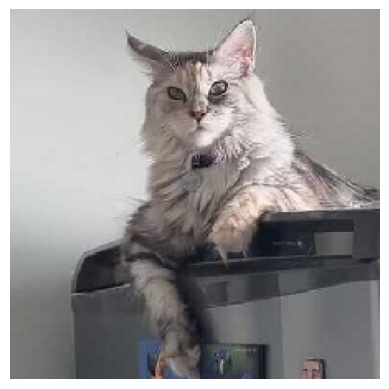

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Verificar se o TensorFlow está utilizando a GPU
print("Num GPUs Available:", len(tf.config.experimental.list_physical_devices('GPU')))

# Carregue o modelo MobileNet V2 pré-treinado
model = tf.keras.applications.MobileNetV2(weights='imagenet')

# Carregue uma imagem de exemplo (substitua pelo seu caminho)
image_path = '/content/lois_389.jpg'
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
image_array = tf.keras.preprocessing.image.img_to_array(image)
image_array = tf.keras.applications.mobilenet_v2.preprocess_input(image_array)
image_array = tf.expand_dims(image_array, axis=0)

# Faça a previsão
predictions = model.predict(image_array)
decoded_predictions = tf.keras.applications.mobilenet_v2.decode_predictions(predictions)

# Exiba os resultados
for _, label, score in decoded_predictions[0]:
    print(f"{label}: {score:.2f}")

# Exiba a imagem
plt.imshow(image)
plt.axis('off')
plt.show()




**O treinamento errou na definição da raça, rsrsrs. Essa gatinha linda, é uma Tabby,  mas da raça Maine Coon.**




---


# Explicando o que foi feito.

Este código mostra como carregar um modelo de rede neural pré-treinado (MobileNet V2), carregar uma imagem específica, pré-processá-la de acordo com os requisitos do modelo e fazer uma previsão sobre a imagem carregada. Ele exemplifica a facilidade de uso do TensorFlow e o poder dos modelos pré-treinados para tarefas de visão computacional, como classificação de imagens.



1. **Importações Iniciais:**
   ```python
   import tensorflow as tf
   import matplotlib.pyplot as plt
   ```
   - Importamos o TensorFlow para utilizar suas funcionalidades de deep learning e o Matplotlib para exibir a imagem e os resultados.

2. **Carregando o Modelo MobileNet V2 Pré-Treinado:**
   ```python
   model = tf.keras.applications.MobileNetV2(weights='imagenet')
   ```
   - Carregamos o modelo MobileNet V2 pré-treinado com pesos do conjunto de dados ImageNet. Esse modelo já foi treinado em milhões de imagens para reconhecer milhares de categorias.

3. **Carregando e Pré-processando a Imagem:**
   ```python
   image_path = '/content/lois_389.jpg'
   image = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
   image_array = tf.keras.preprocessing.image.img_to_array(image)
   image_array = tf.keras.applications.mobilenet_v2.preprocess_input(image_array)
   image_array = tf.expand_dims(image_array, axis=0)
   ```
   - Carregamos uma imagem de exemplo do caminho especificado (`'/content/lois_389.jpg'`) e a redimensionamos para o tamanho esperado pelo MobileNet V2 (224x224 pixels).
   - Convertemos a imagem em um array numpy usando `img_to_array()`.
   - Aplicamos o pré-processamento específico do MobileNet V2 usando `preprocess_input()`, que normaliza os valores dos pixels e aplica outras transformações necessárias.
   - Expandimos as dimensões do array para prepará-lo para ser passado como entrada para o modelo (`axis=0` adiciona uma dimensão no início para representar o batch).

4. **Fazendo a Previsão:**
   ```python
   predictions = model.predict(image_array)
   decoded_predictions = tf.keras.applications.mobilenet_v2.decode_predictions(predictions)
   ```
   - Usamos o modelo pré-treinado para fazer previsões sobre a imagem pré-processada.
   - `model.predict(image_array)` gera um vetor de previsões para a imagem.
   - `decode_predictions(predictions)` decodifica as previsões em uma lista de tuplas contendo o nome e a probabilidade das classes mais prováveis.

5. **Exibindo os Resultados das Previsões:**
   ```python
   print("Previsões:")
   for _, label, score in decoded_predictions[0]:
       print(f"{label}: {score:.2f}")
   ```
   - Iteramos pelas previsões decodificadas (`decoded_predictions[0]`) e exibimos o nome da classe e sua pontuação de confiança.

6. **Exibindo a Imagem:**
   ```python
   plt.imshow(image)
   plt.axis('off')
   plt.show()
   ```
   - Exibimos a imagem original carregada usando Matplotlib.
   - `plt.axis('off')` remove os eixos para uma exibição mais limpa da imagem.


